<a href="https://colab.research.google.com/github/Priyo-prog/Deep-Learning-with-Tensorflow/blob/main/Neural%20Network%20Regression%20with%20Tensorflow/Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Regression with Neural Network using Tensorflow**

In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome' or 'response' variable) and one or more independent variables (often called 'predictors', 'covariates', 'explanatory variables' or 'features'). The most common form of regression analysis is linear regression, in which one finds the line (or a more complex linear combination) that most closely fits the data according to a specific mathematical criterion. For example, the method of ordinary least squares computes the unique line (or hyperplane) that minimizes the sum of squared differences between the true data and that line (or hyperplane). For specific mathematical reasons (see linear regression), this allows the researcher to estimate the conditional expectation (or population average value) of the dependent variable when the independent variables take on a given set of values. Less common forms of regression use slightly different procedures to estimate alternative location parameters (e.g., quantile regression or Necessary Condition Analysis[1]) or estimate the conditional expectation across a broader collection of non-linear models (e.g., nonparametric regression).

In [1]:
import tensorflow as tf
tf.__version__

'2.6.0'

# Creating Data to view and fit

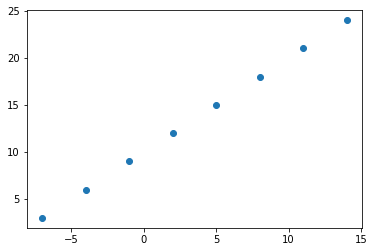

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features

X = np.array([-7.,-4.,-1.,2.,5.,8.,11.,14.])

# Create Labels
y = np.array([3.,6.,9.,12.,15.,18.,21.,24.])

# Visualize it
plt.scatter(X,y)

In [3]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and Output Shapes

In [4]:
# Creating a demo tensor for our price prediction problem

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
# We want to predict one output of 'y' for one input of 'X'
X[0], y[0]

(-7.0, 3.0)

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape   # These will show no shape because they are individual scalar without dimension 

((), ())

In [7]:
X[0].ndim

0

In [8]:
# Turn Numpy arrays to tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

# Steps in modelling the tensorflow

1. **Creating a model** - Define the input and output layers, as well
as the hidden layers in the deep learning model
2. **Compiling a model** - Define the loss function (in other words,
the function which tells us our model how wrong it is) and the optimizer ( tells our model how to improve the pattern its learning) and evaluation
metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - Letting the model try to find patterns between X & y(features and labels)


In [9]:
# Set random seed
tf.random.set_seed(42)

# 1.Create the model using Sequential API
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1)  # Add a hidden layer                            
])

# 2.Compile the model
model.compile(loss=tf.keras.losses.mae, # "mae" is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # "sgd" is short for stochastic gradient descent
              metrics="mae") 

# 3.Fit the model
model.fit(X,y, epochs=5) 

Epoch 1/5
1/1 [==============================] - 1s 588ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mae: 10.9748


In [10]:
# X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [11]:
# Try to make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

# Improving the model

We can improve our model, by altering the steps we took to create the model.

1. **Creating a model** - Here we might add more layers, increase the number
of hidden units (all called neurons) within each of the hidden layers,
change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps
the **learning rate** of the optimization function.

3. Fitting a model - Here we might fit the model for more **epochs** (leave it 
training for longer) or on more data (give the model more examples to learn
from).


In [12]:
# Let's rebuild the model

# 1. Create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics="mae")

# 3. Fit the model ( we'll train for longer)
model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 244ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 4m

In [13]:
# Remind ourselves X & y
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [14]:
# Let's see if our model has improved
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [15]:
# Let's see if we can make another to improve the model

# 1. Create the model
model = tf.keras.Sequential(
    [ tf.keras.layers.Dense(100, activation="relu"), # Adding extra hidden layer with activation
      tf.keras.layers.Dense(1)     
    ])

# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics="mae")

# 3. Fit the model
model.fit(X,y, epochs=100) 

Epoch 1/100
1/1 [==============================] - 0s 316ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - l

In [16]:
# Let's remind ourselves about the data
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [17]:
# Let's see the prediction
y_pred = model.predict([17.0])
y_pred

array([[31.223137]], dtype=float32)

In [18]:
# Let's create the model once again

# 1. Creating the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01)) # Adding the Adam optimizer and increasing the learning rate

# Fit the model
model.fit(X,y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 326ms/step - loss: 12.7339
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.9052
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 11.0712
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.2556
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 9.6071
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 8.9779
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 8.3324
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 7.6675
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 6.9773
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 6.2578
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - loss: 5.5048
Epoch 12/100
1/1 [==============================] - 0s 8ms/step - loss: 4.7182
Epoch 13/100
1/1 [==============================] - 0

In [19]:
# Let's remind ourselves about the data
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [20]:
y_pred = model.predict([17.0])
y_pred

array([[26.43606]], dtype=float32)

# Evaluating a tensorflow model

In practice a typical workflow you'll go through when building neural network is :


Build a model -> Fit it -> Evaluate it -> Tweak it -> ....

When it comes to evaluation ... you should always remember... VISUALIZE..

1. The data - What data we are working? what it looks like ?

2. The model itself - What does our model look like

3. The training of a model - How the model perform while it learns?

4. The prediction of the model - How do the predictions of a model line up
against the ground truth ?


In [24]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [25]:
# Make the labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

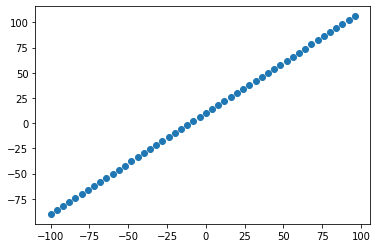

In [26]:
# Visualize the data with matplotlib
plt.scatter(X,y)

# Splitting the dataset

1. **The training set** - The model learns from this data, which is typically 70-80% of the total data

2. **Validation set** - The model gets tuned in this data, which is typically 10-15%
of the total data.

3. **Test set** - the model gets evaluated in this set to test what it has learned,
this set is typically 10-15% of the total data available



In [27]:
# Check the length of sample we have
len(X)

50

In [28]:
# Splitting the data in train and test sets
X_train = X[:40] # First 40 samples(80% of the data)
y_train = y[:40]

X_test = X[40:]  # Last 10 are testing samples (20% of the data)
y_test = y[40:] 

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

# Visualizing the data

Now we got our train and test datawe visualize again

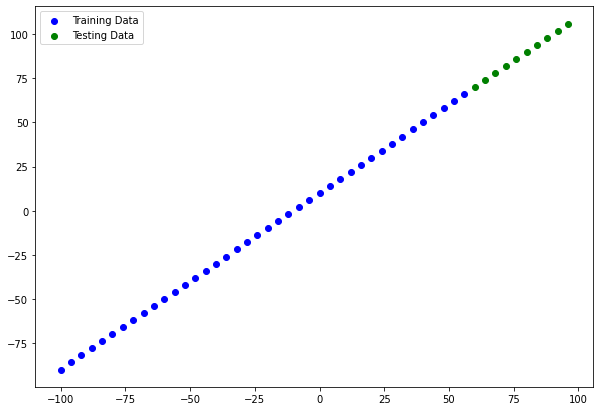

In [30]:
plt.figure(figsize=(10,7))

# Plot training data in blue
plt.scatter(X_train,y_train, c="b", label="Training Data") # model will learn on this data

# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing Data")   # model will be evaluated in this data

# Show a legend
plt.legend()

In [34]:
# Build the neural network from our data

# 1. Create a model - 
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(1)    
    ])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the data
#model.fit(X_train,y_train, epochs=100)

In [35]:
model.summary()

ValueError: ignored

In [37]:
# Let's create a model automatically by defining the input_shape arguement in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=[1])) # shape of the data what we are passing to the model

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.summary() 

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
